# Pregunta 2.
## 1. ¿El dataset está en formato tidy? Justifique su respuesta.
---
- No, ya que hay columnas con 80% o más de valores Nan, y una columna como “food” tiene más de un valor.


Para analizar el dataset hemos hecho los siguientes pasos:

1. Importar los modulos que vamos a usar.
---

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from typing import Generator

Leemos el CSV fichero.

In [2]:
df_outbreaks: pd.DataFrame = pd.read_csv("../data/outbreaks.csv", sep=",")  # type:ignore

2. Calcular el porcentaje de NaN de cada columna.
---

In [3]:
def count_na_percentage(df: pd.DataFrame) -> pd.DataFrame:
    "Calculates what percentage of NA each column has."

    total_rows: int = len(df)

    na_percentages_result: dict[str, float] = {}

    for column in df.columns:

        column_na_sum: int = df[column].isna().sum()  # type:ignore
        column_na_percentage: float = round(((column_na_sum / total_rows) * 100), 2)

        na_percentages_result[column] = column_na_percentage

    return pd.DataFrame(
        data={
            "columns": list(na_percentages_result.keys()),
            "na_percentages": list(na_percentages_result.values()),
        }
    )

3. Crear un plot de lineas para visualizar el resultado.
---

In [4]:
def plot_na_percentages(path: str, delimiter: str) -> None:
    "Plots the D.F. of the calculated results as a lineplot."

    pd.set_option('display.max_columns', None)

    df_outbreaks:   pd.DataFrame = pd.read_csv(path, sep=delimiter) #type:ignore
    na_percentages: pd.DataFrame = count_na_percentage(df_outbreaks)

    na_percentages.plot(
        title="Percentages of NA per column",
        x="columns",
        y="na_percentages",
        xlabel="Columns",
        ylabel="NA percentages (%)",
        marker="o",
    )

    plt.xticks(range(0, len(na_percentages)), na_percentages['columns'])
    plt.gcf().set_size_inches(16, 5) #type:ignore
    # plt.show()

4. El resultado del analisis de porcentajes de NaN por columnas.
---
- Como podemos ver las columnas de "Ingredients" y "Serotype\Genotype" no nos van a servir en el futuro, así en el punto 2. los vamos a borrar.

In [5]:
df_outbreaks

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17390,2015,December,Wisconsin,Restaurant,NaN,NaN,Norovirus genogroup II,GII_14,Confirmed,4,0.0,0.0
17391,2015,December,Wisconsin,Private Home/Residence,Salsa,NaN,Norovirus genogroup II,GII_2,Confirmed,16,0.0,0.0
17392,2015,December,Wisconsin,Nursing Home/Assisted Living Facility,NaN,NaN,Norovirus genogroup II,GII_17 Kawasaki (2014),Confirmed,43,3.0,0.0
17393,2015,December,Wisconsin,Fast Food Restaurant,NaN,NaN,Norovirus genogroup II,GII_2,Confirmed,5,0.0,0.0


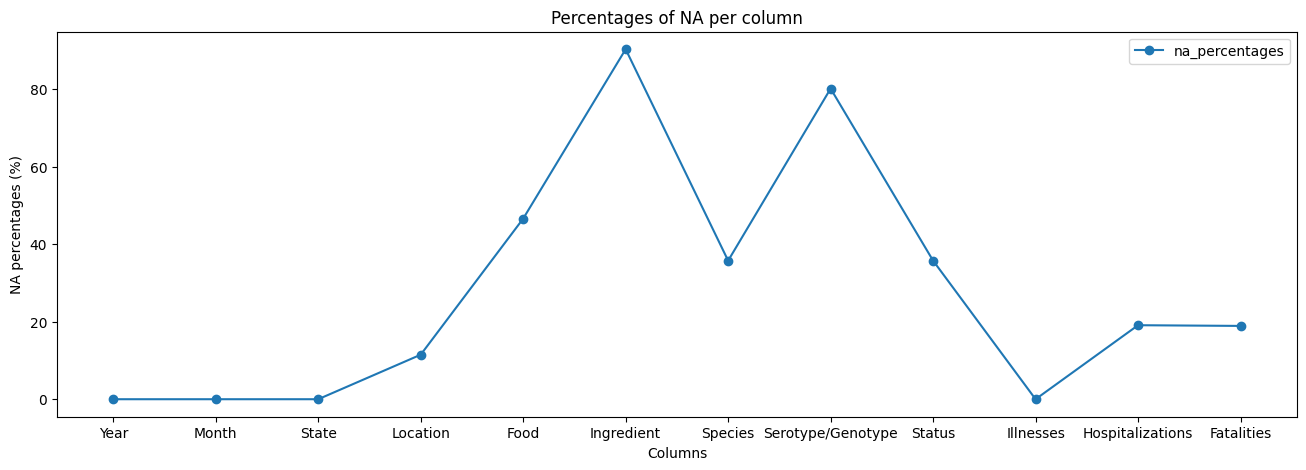

In [6]:
plot_na_percentages("../data/outbreaks.csv", ',')

5. Ahora vamos a chequar las columnas que tienen multiples valores. Para esto hemos escrito la siguiente función.
---

In [7]:
def check_if_multi_valued(df: pd.DataFrame) -> Generator[str, None, None]:
    ''' Loops through the given data frame and if finds any multi-value field in
        any column, then returns a Generator with the "multi-valued" column names.
    '''
    
    observed: set = set() 
    for column in df.columns:
        for row in df.to_dict('records'):

            if len(str(row[column]).split(';')) > 1 \
                and column not in observed:

                observed.add(column)

                yield column

Como el resultado dice, las siguientes columnas contienen multiples valores:
- "Ingredient"
- "Food"

Con la columna "Ingredient" no nos vamos a preocupar mucho, porque será eliminado, pero la columna "Food" sí tenemos que resolver en el siguiente punto.

In [8]:
print(set(check_if_multi_valued(df_outbreaks)))

{'Food', 'Ingredient'}


## 2. Si no lo está, póngalo en este formato utilizando Pandas.
---

1. Antés todo, quitamos las columnas que no nos dan informaciones utiles (tienen muy pocos datos).
---

In [9]:
def drop_uninformative_columns(df: pd.DataFrame) -> pd.DataFrame:
    "Drops unnecessary columns, because they are uninformative.."

    # Lowercase all column names
    df.columns = df.columns.str.lower()

    # Drop columns
    df.drop(["ingredient", "serotype/genotype"], inplace=True, axis=1)  # type:ignore

    # Drop uninformative rows.
    # If it has <= 5 columns, gets dropped.
    df.dropna(thresh=5, inplace=True)  # type: ignore

    return df

In [10]:
trimmed_df_outbreaks: pd.DataFrame = drop_uninformative_columns(df_outbreaks)
trimmed_df_outbreaks

,year,month,state,location,food,species,status,illnesses,hospitalizations,fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",Scombroid toxin,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",Salmonella enterica,Confirmed,26,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...
17390,2015,December,Wisconsin,Restaurant,NaN,Norovirus genogroup II,Confirmed,4,0.0,0.0
17391,2015,December,Wisconsin,Private Home/Residence,Salsa,Norovirus genogroup II,Confirmed,16,0.0,0.0
17392,2015,December,Wisconsin,Nursing Home/Assisted Living Facility,NaN,Norovirus genogroup II,Confirmed,43,3.0,0.0
17393,2015,December,Wisconsin,Fast Food Restaurant,NaN,Norovirus genogroup II,Confirmed,5,0.0,0.0


2. Porque tenemos multiples valores en la columna "Food", así tenemos que explotar a varias filas, pero tampoco podemos dejar en el mismo data frame, porque los valores de las columnas "Illnesses", "Hospitalizations", "Fatalities" sería duplicado o dividido, que no sea correcto, ya que perderíamos la precisión de las informaciones extraidas. Así solo nos queda la siguiente solución:

- Separar la columna "Food" a otro data frame con una columna identificadora "case_id" (copiamos el serie de index), que nos servirá como clave primaria entre los casos (a que le damos la misma columna identificadora).

In [11]:
def split_df(df: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
    "Split the dataframe into 'df_cases' and 'df_food'."

    # Add primary keys for each cases
    df.insert(0, "case_id", df.index + 1)

    # - Create dataframe for the food column. [case_id,  food].
    df_food: pd.DataFrame = pd.DataFrame(df.loc[:, ["case_id", "food"]])

    # - Create "cases" dataframe (all columns, except food..).
    df_cases: pd.DataFrame = pd.DataFrame(df.loc[:, df.columns != "food"])
    
    return df_cases, df_food

In [12]:
df_cases, df_food = split_df(trimmed_df_outbreaks)

3. Ahora que ya tenemos separados los dos dataframe, podemos "uniqfy" / explotar los multiples valores a varias filas.
(NOTA: En el mismo tiempo queremos dejar el valor NaN, como "unknown" por claridad. En el caso de la comida no necesariamente tenemos valores no disponibles. Puede ser que las personas recogiendo los datos no han podido identificar el tipo de la comida. Así, dejamos "unknown" los valores NaN, durante la iteración.)
---

In [13]:
def uniqfy_df_food(df_food: pd.DataFrame) -> pd.DataFrame:
    ''' "Uniqfies" the food column in the "df_food" data frame.
    '''

    df_food.reset_index(inplace=True)
    cleaned_df_food: dict[str, list[int | str]] = {"case_id": [], "food": []}

    for _, row in df_food.iterrows():

        split_food = map(str.strip, re.split(r",|;", str(row["food"])))

        for food in split_food:
            food = food.replace("unspecified", "unknown")

            if food == "nan":
                food = "unknown"

            food = food.lower()

            cleaned_df_food["case_id"] += (row["case_id"],) # type: ignore
            cleaned_df_food["food"]    += (food,)

    return pd.DataFrame(cleaned_df_food)

In [14]:
df_food: pd.DataFrame = uniqfy_df_food(df_food)
df_food

,case_id,food
0,1,unknown
1,2,custard
2,3,unknown
3,4,fish
4,4,ahi
...,...,...
26975,17391,unknown
26976,17392,salsa
26977,17393,unknown
26978,17394,unknown


## 3. Conclusión
---

Como resultado de está pregunta tenemos los siguientes data frames y columnas:

Data frame: df_cases;

Columnas: "case_id", "year", "month", "state", "location", "species",	"status",	"illnesses", "hospitalizations", "fatalities"

---

Data frame: df_food;

Columnas: "case_id", "food"

La relación entre los dos dataframe es la clave primaria: "case_id".

In [15]:
df_cases

,case_id,year,month,state,location,species,status,illnesses,hospitalizations,fatalities
0,1,1998,January,California,Restaurant,NaN,NaN,20,0.0,0.0
1,2,1998,January,California,NaN,NaN,NaN,112,0.0,0.0
2,3,1998,January,California,Restaurant,NaN,NaN,35,0.0,0.0
3,4,1998,January,California,Restaurant,Scombroid toxin,Confirmed,4,0.0,0.0
4,5,1998,January,California,Private Home/Residence,Salmonella enterica,Confirmed,26,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...
17390,17391,2015,December,Wisconsin,Restaurant,Norovirus genogroup II,Confirmed,4,0.0,0.0
17391,17392,2015,December,Wisconsin,Private Home/Residence,Norovirus genogroup II,Confirmed,16,0.0,0.0
17392,17393,2015,December,Wisconsin,Nursing Home/Assisted Living Facility,Norovirus genogroup II,Confirmed,43,3.0,0.0
17393,17394,2015,December,Wisconsin,Fast Food Restaurant,Norovirus genogroup II,Confirmed,5,0.0,0.0


In [16]:
df_food

,case_id,food
0,1,unknown
1,2,custard
2,3,unknown
3,4,fish
4,4,ahi
...,...,...
26975,17391,unknown
26976,17392,salsa
26977,17393,unknown
26978,17394,unknown


## Guardamos los data frames resultados en csv, para que sea procesado más en la siguiente pregunta.

In [17]:
def write_dataframe_to_csv(path: str, df: pd.DataFrame) -> None:
    "Writes out the given DF to a csv file."

    filepath = Path(path)
    filepath.parent.mkdir(parents=True, exist_ok=True)

    df.to_csv(filepath, index=False)

write_dataframe_to_csv("../data/cleaned_csv/2-question_results/cases.csv", df_cases)
write_dataframe_to_csv("../data/cleaned_csv/2-question_results/food.csv", df_food)